<a href="https://colab.research.google.com/github/ArthurChan-1111/Bitcoin_prediction/blob/main/Master_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Packages

In [29]:
!pip install pandas_ta
!pip install numpy==1.23.5
!pip install pandas
!pip install seaborn

In [30]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# Importing libraries for building linear regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import summary_table, OLSInfluence
from statsmodels.regression.linear_model import OLSResults
from statsmodels.stats.stattools import durbin_watson as dwtest
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

from scipy import stats
from scipy.stats import zscore

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, cross_val_score

import pylab as py

# To help with model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.4f" % x)

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)


#Load dataset

In [31]:
!git clone https://github.com/ArthurChan-1111/Bitcoin_prediction.git

%cd Bitcoin_prediction

%pip install pandas_ta

import pandas as pd
import pandas_ta as ta
import csv
import numpy as np

btc_data = pd.read_csv('Bitcoin Historical Data.csv', on_bad_lines='skip', lineterminator='\n')
btc_data.tail(5)

Cloning into 'Bitcoin_prediction'...
remote: Enumerating objects: 230, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 230 (delta 67), reused 8 (delta 2), pack-reused 119 (from 1)
Receiving objects: 100% (230/230), 11.82 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (110/110), done.
/content/Bitcoin_prediction/Bitcoin_prediction/Bitcoin_prediction/Bitcoin_prediction


Date     Price     Open      High      Low Vol. ('000) Change %\r
4107  1/5/2014 1014.7000 924.7000 1029.9000 911.4000       21.37    9.74%\r
4108  1/4/2014  924.7000 884.3000  932.2000 848.3000       14.24    4.57%\r
4109  1/3/2014  884.3000 856.9000  888.2000 839.4000        9.71    3.19%\r
4110  1/2/2014  856.9000 815.9000  886.2000 810.5000       12.81    5.02%\r
4111  1/1/2014  815.9000 805.9000  829.9000 771.0000       10.76      1.24%

In [32]:
# Convert the dictionary to a DataFrame
btc_data = pd.DataFrame(btc_data)

# Parse the "Date" column into datetime format
btc_data["Date"] = pd.to_datetime(btc_data["Date"], format="%m/%d/%Y")

# Sort the data by date in ascending order
btc_data.sort_values(by="Date", ascending=True, inplace=True)


In [33]:
!git clone https://github.com/ArthurChan-1111/Bitcoin_prediction.git

%cd Bitcoin_prediction

gold_price_data = pd.read_csv('gold_price_data.csv', on_bad_lines='skip', lineterminator='\n', sep=';')
gold_price_data.tail(5)

Cloning into 'Bitcoin_prediction'...
remote: Enumerating objects: 230, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 230 (delta 67), reused 8 (delta 2), pack-reused 119 (from 1)
Receiving objects: 100% (230/230), 11.82 MiB | 13.03 MiB/s, done.
Resolving deltas: 100% (110/110), done.
/content/Bitcoin_prediction/Bitcoin_prediction/Bitcoin_prediction/Bitcoin_prediction/Bitcoin_prediction


Date  Gold_Price  Gold_Volume
4047  2025-01-30   2794.0600   83835.0000
4048  2025-01-31   2799.2300   91164.0000
4049  2025-02-01   2799.2300   91164.0000
4050  2025-02-02   2799.2300   91164.0000
4051  2025-02-03   2794.4100    1631.0000

In [34]:
!git clone https://github.com/ArthurChan-1111/Bitcoin_prediction.git

%cd Bitcoin_prediction

risk_free_data = pd.read_csv('risk_free_data.csv', on_bad_lines='skip', lineterminator='\n', sep=',')
risk_free_data.tail(5)

Cloning into 'Bitcoin_prediction'...
remote: Enumerating objects: 230, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 230 (delta 67), reused 8 (delta 2), pack-reused 119 (from 1)
Receiving objects: 100% (230/230), 11.82 MiB | 15.12 MiB/s, done.
Resolving deltas: 100% (110/110), done.
/content/Bitcoin_prediction/Bitcoin_prediction/Bitcoin_prediction/Bitcoin_prediction/Bitcoin_prediction/Bitcoin_prediction


Date  US_10Y  Yield_Spread
4126  2025-04-19  4.3400        0.5300
4127  2025-04-20  4.3400        0.5300
4128  2025-04-21  4.4200        0.6700
4129  2025-04-22  4.4100        0.6500
4130  2025-04-23  4.4000        0.5900

In [35]:
#Change the 'Date' to datetime format
gold_price_data['Date'] = pd.to_datetime(gold_price_data['Date'])
risk_free_data['Date'] = pd.to_datetime(risk_free_data['Date'])

#Data Preprocessing

In [36]:
#Function to clean and convert volume data
def clean_volume(volume):
    if isinstance(volume, str):  # Check if the value is a string
        volume = volume.replace(',', '')  # Remove commas
        if 'B' in volume:  # If the value contains 'B' (billions)
            return float(volume.replace('B', '')) * 1_000_000_000
        elif 'M' in volume:  # If the value contains 'M' (millions)
            return float(volume.replace('M', '')) * 1_000_000
        elif 'K' in volume:  # If the value contains 'K' (thousands)
            return float(volume.replace('K', '')) * 1_000
        else:  # If no suffix is present, convert to float directly
            return float(volume)
    return np.nan  # Handle unexpected cases

# Apply the cleaning function to the volume column
btc_data["Volume"] = btc_data["Vol. ('000)"].apply(clean_volume)
btc_data = btc_data.drop("Vol. ('000)", axis=1)

# 4. Remove '%' from "Change %" and convert to numeric
btc_data.rename(columns={"Change %\r": "Change"}, inplace=True)
btc_data["Change"] = btc_data["Change"].str.replace("%", "").str.strip().astype(float)

In [37]:
# Day of the week (0=Monday, 6=Sunday)
btc_data["Day_of_Week"] = btc_data["Date"].dt.dayofweek

# Week of the year
btc_data["Week_of_Year"] = btc_data["Date"].dt.isocalendar().week

# Month of the year
btc_data["Month"] = btc_data["Date"].dt.month

# Quarter of the year
btc_data["Quarter"] = btc_data["Date"].dt.quarter

# Year
btc_data["Year"] = btc_data["Date"].dt.year

## Signal Detection

In [38]:
# Calculate RSI, EMA, SMA, and MACD
btc_data["RSI_6"] = ta.rsi(btc_data["Price"], length=6)  # Relative Strength Index
btc_data["RSI_12"] = ta.rsi(btc_data["Price"], length=12)  # Relative Strength Index
btc_data["EMA_14"] = ta.ema(btc_data["Price"], length=14)  # Exponential Moving Average
btc_data["SMA_14"] = ta.sma(btc_data["Price"], length=14)  # Simple Moving Average

# Add On-Balance Volume (OBV)
btc_data["OBV"] = ta.obv(btc_data["Price"], btc_data["Volume"])

# Calculate MACD --------------------------------------------------------------------------------------
macd = ta.macd(btc_data["Price"], fast=12, slow=26, signal=9)
btc_data["MACD"] = macd["MACD_12_26_9"]
btc_data["MACD_Signal"] = macd["MACDs_12_26_9"]

# Create MACD_buy: 1 if MACD crosses above MACD_Signal, otherwise 0
btc_data["MACD_buy"] = 0  # Default to 0 (no buy signal)
btc_data.loc[
    (btc_data["MACD"] > btc_data["MACD_Signal"]) &  # MACD is above Signal
    (btc_data["MACD"].shift(1) <= btc_data["MACD_Signal"].shift(1)),  # Previous MACD was below or equal to Signal
    "MACD_buy"] = 1  # Buy signal

# Create MACD_sell: 1 if MACD crosses below MACD_Signal, otherwise 0
btc_data["MACD_sell"] = 0  # Default to 0 (no sell signal)
btc_data.loc[
    (btc_data["MACD"] <= btc_data["MACD_Signal"]) &  # MACD is below or equal to Signal
    (btc_data["MACD"].shift(1) > btc_data["MACD_Signal"].shift(1)),  # Previous MACD was above Signal
    "MACD_sell"] = 1  # Sell signal

# New Variable: MACD_above_signal (1 if MACD > MACD_Signal, otherwise 0)
btc_data["MACD_above_signal"] = (btc_data["MACD"] > btc_data["MACD_Signal"]).astype(int)

# New Variable: MACD_below_signal (1 if MACD <= MACD_Signal, otherwise 0)
btc_data["MACD_below_signal"] = (btc_data["MACD"] <= btc_data["MACD_Signal"]).astype(int)

# Create MACD_cum_buy: Accumulate consecutive days where MACD_above_signal is 1
btc_data["MACD_cum_buy"] = (
    btc_data["MACD_above_signal"]
    .groupby((btc_data["MACD_above_signal"] == 0).cumsum())  # Group by resets when MACD_above_signal is 0
    .cumcount()  # Count consecutive days starting from 1
)
btc_data.loc[btc_data["MACD_above_signal"] == 0, "MACD_cum_buy"] = 0  # Reset to 0 where the condition is not met

# Create MACD_cum_sell: Accumulate consecutive days where MACD_below_signal is 1
btc_data["MACD_cum_sell"] = (
    btc_data["MACD_below_signal"]
    .groupby((btc_data["MACD_below_signal"] == 0).cumsum())  # Group by resets when MACD_below_signal is 0
    .cumcount()  # Count consecutive days starting from 1
)
btc_data.loc[btc_data["MACD_below_signal"] == 0, "MACD_cum_sell"] = 0  # Reset to 0


# Calculate Bollinger Bands --------------------------------------------------------------------------------------
bb = ta.bbands(btc_data["Price"], length=20, std=2)  # 20-period BB with 2 standard deviations
btc_data["BB_upper"] = bb.get("BBU_20_2.0")  # Upper Bollinger Band
btc_data["BB_lower"] = bb.get("BBL_20_2.0")  # Lower Bollinger Band

# Create BB_Buy: 1 if Price crosses below the Lower Band, otherwise 0
btc_data["BB_Buy"] = 0  # Default to 0 (no buy signal)
btc_data.loc[
    (btc_data["Price"] < btc_data["BB_lower"]) &  # Price is below the Lower Band
    (btc_data["Price"].shift(1) >= btc_data["BB_lower"].shift(1)),  # Previous Price was above or equal to Lower Band
    "BB_Buy"] = 1  # Buy signal

# Create BB_Sell: 1 if Price crosses above the Upper Band, otherwise 0
btc_data["BB_Sell"] = 0  # Default to 0 (no sell signal)
btc_data.loc[
    (btc_data["Price"] > btc_data["BB_upper"]) &  # Price is above the Upper Band
    (btc_data["Price"].shift(1) <= btc_data["BB_upper"].shift(1)),  # Previous Price was below or equal to Upper Band
    "BB_Sell"] = 1  # Sell signal

# New Variable: Price_above_lower_band (1 if Price > BB_lower, otherwise 0)
btc_data["Price_below_BB_lower"] = (btc_data["Price"] < btc_data["BB_lower"]).astype(int)

# New Variable: Price_below_upper_band (1 if Price < BB_upper, otherwise 0)
btc_data["Price_above_BB_upper"] = (btc_data["Price"] > btc_data["BB_upper"]).astype(int)

# Create BB_cum_Buy: Accumulate consecutive days where Price_below_BB_lower is 1
btc_data["BB_cum_Buy"] = (
    btc_data["Price_below_BB_lower"]
    .groupby((btc_data["Price_below_BB_lower"] == 0).cumsum())  # Group by resets when Price_below_BB_lower is 0
    .cumcount()  # Count consecutive days starting from 1
)
btc_data.loc[btc_data["Price_below_BB_lower"] == 0, "BB_cum_Buy"] = 0  # Reset to 0 where the condition is not met

# Create BB_cum_Sell: Accumulate consecutive days where Price_above_BB_upper is 1
btc_data["BB_cum_Sell"] = (
    btc_data["Price_above_BB_upper"]
    .groupby((btc_data["Price_above_BB_upper"] == 0).cumsum())  # Group by resets when Price_above_BB_upper is 0
    .cumcount()  # Count consecutive days starting from 1
)
btc_data.loc[btc_data["Price_above_BB_upper"] == 0, "BB_cum_Sell"] = 0  # Reset to 0 where the condition is not met

# Calculate ATR --------------------------------------------------------------------------------------
btc_data["ATR"] = ta.atr(btc_data["High"], btc_data["Low"], btc_data["Price"], length=14)

# Set Stop-Loss Levels (Example with Long Trade)
atr_multiplier = 2
btc_data["Stop_Loss_Long"] = btc_data["Price"] - (btc_data["ATR"] * atr_multiplier) #Stop-Loss for Buy (Long) Trade
btc_data["Stop_Loss_Short"] = btc_data["Price"] + (btc_data["ATR"] * atr_multiplier) #Stop-Loss for Sell (Short) Trade

# Calculate VWAP --------------------------------------------------------------------------------------
btc_data.set_index("Date", inplace=True) # Set the "Date" column as the index
btc_data["VWAP"] = ta.vwap(btc_data["High"], btc_data["Low"], btc_data["Price"], btc_data["Volume"])

# Create VWAP_Buy: 1 if Price crosses above VWAP, otherwise 0
btc_data["VWAP_Buy"] = 0  # Default to 0 (no buy signal)
btc_data.loc[
    (btc_data["Price"] > btc_data["VWAP"]) &  # Price is above VWAP
    (btc_data["Price"].shift(1) <= btc_data["VWAP"].shift(1)),  # Previous Price was below or equal to VWAP
    "VWAP_Buy"] = 1  # Buy signal

# Create VWAP_Sell: 1 if Price crosses below VWAP, otherwise 0
btc_data["VWAP_Sell"] = 0  # Default to 0 (no sell signal)
btc_data.loc[
    (btc_data["Price"] < btc_data["VWAP"]) &  # Price is below VWAP
    (btc_data["Price"].shift(1) >= btc_data["VWAP"].shift(1)),  # Previous Price was above or equal to VWAP
    "VWAP_Sell"] = 1  # Sell signal

# Fear and greed index
fear_and_greed_index = pd.read_csv('fear_and_greed_index.csv')
# rename the date column in fear_and_greed_index to Date
fear_and_greed_index.rename(columns={"date": "Date", "value": "Fear_and_Greed_Index"}, inplace=True)
# convert the date column to datetime
fear_and_greed_index["Date"] = pd.to_datetime(fear_and_greed_index["Date"], format="%Y-%m-%d")
# dropping the timestamp, value_classification, time_until_update columns
fear_and_greed_index.drop(columns=["timestamp", "value_classification", "time_until_update"], inplace=True)
fear_and_greed_index.head()

# Join the two dataframes on the "Date" column, dropping
btc_data = btc_data.merge(fear_and_greed_index, on="Date", how="left")
btc_data.head(20)

# Support and Resistance Levels
btc_data["Support"] = btc_data["Low"].rolling(window=20).min()  # Lowest low in the past 20 days
btc_data["Resistance"] = btc_data["High"].rolling(window=20).max()  # Highest high in the past 20 days

# Add two columns for extreme fear and extreme greed
btc_data["Extreme_Fear"] = np.where(btc_data["Fear_and_Greed_Index"] < 0.2, 1, 0)
btc_data["Extreme_Greed"] = np.where(btc_data["Fear_and_Greed_Index"] > 0.8, 1, 0)
btc_data.describe().T

# Use 70 in RSI to classify overbought and 30 to classify oversold
btc_data["RSI_12_Overbought"] = np.where(btc_data["RSI_12"] > 70, 1, 0)
btc_data["RSI_12_Oversold"] = np.where(btc_data["RSI_12"] < 30, 1, 0)
btc_data.describe().T

# Adding RSI_6 greater than RSI_12 to show bullish divergence and conversely
btc_data["RSI_Bullish_Divergence"] = np.where(btc_data["RSI_6"] > btc_data["RSI_12"], 1, 0)
btc_data["RSI_Bearish_Divergence"] = np.where(btc_data["RSI_6"] < btc_data["RSI_12"], 1, 0)
btc_data.describe().T


count                           mean  \
Date                        4112  2019-08-18 12:29:03.968871680   
Price                  4112.0000                     20054.0257   
Open                   4112.0000                     20033.9806   
High                   4112.0000                     20493.3449   
Low                    4112.0000                     19546.5392   
Change                 4112.0000                         0.2508   
Volume                 4112.0000                  14866224.9030   
Day_of_Week            4112.0000                         2.9998   
Week_of_Year           4112.0000                        26.1588   
Month                  4112.0000                         6.4219   
Quarter                4112.0000                         2.4752   
Year                   4112.0000                      2019.1379   
RSI_6                  4106.0000                        53.0139   
RSI_12                 4100.0000                        52.8984   
EMA_14                 4099.0000                     19982.8588   
SMA_14                 4099.0000                     19983.2887   
OBV                    4112.0000                -544470395.5023   
MACD                   4087.0000                       145.1509   
MACD_Signal            4079.0000                       146.4584   
MACD_buy               4112.0000                         0.0336   
MACD_sell              4112.0000                         0.0333   
MACD_above_signal      4112.0000                         0.5178   
MACD_below_signal      4112.0000                         0.4742   
MACD_cum_buy           4112.0000                         7.2758   
MACD_cum_sell          4112.0000                         5.4961   
BB_upper               4093.0000                     22042.5613   
BB_lower               4093.0000                     17856.4224   
BB_Buy                 4112.0000                         0.0226   
BB_Sell                4112.0000                         0.0370   
Price_below_BB_lower   4112.0000                         0.0503   
Price_above_BB_upper   4112.0000                         0.0832   
BB_cum_Buy             4112.0000                         0.1070   
BB_cum_Sell            4112.0000                         0.1865   
ATR                    4098.0000                       939.9928   
Stop_Loss_Long         4098.0000                     18239.3759   
Stop_Loss_Short        4098.0000                     21999.3472   
VWAP                   4112.0000                     20031.3033   
VWAP_Buy               4112.0000                         0.2566   
VWAP_Sell              4112.0000                         0.2563   
Fear_and_Greed_Index   2616.0000                        47.0099   
Support                4093.0000                     17605.3049   
Resistance             4093.0000                     22170.6212   
Extreme_Fear           4112.0000                         0.0000   
Extreme_Greed          4112.0000                         0.6362   
RSI_12_Overbought      4112.0000                         0.1386   
RSI_12_Oversold        4112.0000                         0.0511   
RSI_Bullish_Divergence 4112.0000                         0.5085   
RSI_Bearish_Divergence 4112.0000                         0.4886   

                                        min                  25%  \
Date                    2014-01-01 00:00:00  2016-10-24 18:00:00   
Price                              111.6000             757.2250   
Open                               111.6000             757.2250   
High                               160.1000             769.2000   
Low                                 91.7000             740.1750   
Change                             -57.2100              -1.2900   
Volume                               0.2600              46.5900   
Day_of_Week                          0.0000               1.0000   
Week_of_Year                         1.0000              13.0000   
Month                                1.0000               3.000

In [39]:
# Calculate the percentage price change over the next 7-day and 2-day (Target Variable for Regression)
btc_data["7D_Pct_Change"] = ((btc_data["Price"].shift(-7) - btc_data["Price"]) / btc_data["Price"]) * 100
btc_data["2D_Pct_Change"] = ((btc_data["Price"].shift(-2) - btc_data["Price"]) / btc_data["Price"]) * 100

# Create binary variables for 7-day and 2-day percentage changes
btc_data["7D_Positive"] = (btc_data["7D_Pct_Change"] > 0).astype(int)  # 1 if positive, 0 if negative
btc_data["2D_Positive"] = (btc_data["2D_Pct_Change"] > 0).astype(int)  # 1 if positive, 0 if negative

## Pattern Detection

In [40]:
# Asending Triangle
# Sort data by Date
btc_data = btc_data.sort_values('Date')

# Calculate exponential moving average for Resistance_Level
btc_data['Resistance_Level'] = btc_data['High'].ewm(span=7, adjust=False).mean()

# Identify rising trendline (higher lows)
btc_data['Low_Shifted'] = btc_data['Low'].shift(1)
btc_data['Higher_Low'] = (btc_data['Low'] > btc_data['Low_Shifted']).astype(int)

# Detect breakout using rolling mean of Volume
btc_data['Breakout'] = btc_data['Price'] > btc_data['Resistance_Level']

# Add ascending triangle detection signal
btc_data['Ascending_Triangle_Breakout'] = btc_data['Breakout']

# Ensure Breakout is binary (1 or 0)
btc_data['Breakout'] = btc_data['Breakout'].astype(int)

# Ensure Ascending_Triangle_Breakout is binary (1 or 0)
btc_data['Ascending_Triangle_Breakout'] = btc_data['Ascending_Triangle_Breakout'].astype(int)

# Calculate the rolling mean of Volume over 7 days
btc_data['Avg_Volume'] = btc_data['Volume'].rolling(window=7).mean()

# Detect breakout with volume confirmation
btc_data['Breakout_With_Volume'] = ((btc_data['High'] > btc_data['Resistance_Level']) &
                                    (btc_data['Volume'] > btc_data['Avg_Volume'])).astype(int)

# Add ascending triangle detection signal with volume
btc_data['Ascending_Triangle_Breakout_With_Volume'] = btc_data['Breakout_With_Volume']

In [41]:
# Count the number of breakouts
breakout_count = btc_data['Ascending_Triangle_Breakout_With_Volume'].sum()
print(f"Number of breakouts: {breakout_count}")

Number of breakouts: 1067


In [42]:
#ADX Pattern (Show the strength of the trend, please only use ADX_Buy_Signal)
!pip install ta
import ta
# Calculate ADX, +DI, and -DI using the ta library
btc_data['ADX'] = ta.trend.adx(btc_data['High'], btc_data['Low'], btc_data['Price'], window=14)
btc_data['+DI'] = ta.trend.adx_pos(btc_data['High'], btc_data['Low'], btc_data['Price'], window=14)
btc_data['-DI'] = ta.trend.adx_neg(btc_data['High'], btc_data['Low'], btc_data['Price'], window=14)

# Define the ADX threshold for a strong trend
adx_threshold = 25

# Generate trade signals
btc_data['ADX_Buy_Signal'] = ((btc_data['ADX'] > adx_threshold) & (btc_data['+DI'] > btc_data['-DI'])).astype(int)
btc_data['ADX_Sell_Signal'] = ((btc_data['ADX'] > adx_threshold) & (btc_data['-DI'] > btc_data['+DI'])).astype(int)

In [43]:
# Count the number of breakout signals
breakout_count = btc_data['ADX_Buy_Signal'].sum()
print(f"Number of breakout signals: {breakout_count}")

Number of breakout signals: 1377


##Join External Data Source

In [44]:
#Left join gold_price_data and risk_free_data to btc_data

btc_data = pd.merge(btc_data, gold_price_data, on='Date', how='left') #till 2025-02-03
btc_data = pd.merge(btc_data, risk_free_data, on='Date', how='left')

#As gold_price and bond yield have market closeure, all na filled by previous day close data

In [45]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     4112 non-null   datetime64[ns]
 1   Price                                    4112 non-null   float64       
 2   Open                                     4112 non-null   float64       
 3   High                                     4112 non-null   float64       
 4   Low                                      4112 non-null   float64       
 5   Change                                   4112 non-null   float64       
 6   Volume                                   4112 non-null   float64       
 7   Day_of_Week                              4112 non-null   int32         
 8   Week_of_Year                             4112 non-null   UInt32        
 9   Month                                    

## **Re-scale and Transformation**

**Yeo-Johnson Transformation** for Price, Change, Pct_Change

In [46]:
# For Price, Change, 7D_Pct_Change, 2D_Pct_Change (use yeo-johnson)
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Initialize PowerTransformer for each column
power_transformer_price = PowerTransformer(method='yeo-johnson', standardize=False)  # Disable standardization
power_transformer_change = PowerTransformer(method='yeo-johnson', standardize=False)
power_transformer_7d_pct_change = PowerTransformer(method='yeo-johnson', standardize=False)
power_transformer_2d_pct_change = PowerTransformer(method='yeo-johnson', standardize=False)

# Apply the Yeo-Johnson transformation to each column
btc_data['YeoJohnson_Price'] = power_transformer_price.fit_transform(btc_data[['Price']])
btc_data['YeoJohnson_Change'] = power_transformer_change.fit_transform(btc_data[['Change']])
btc_data['YeoJohnson_7D_Pct_Change'] = power_transformer_7d_pct_change.fit_transform(btc_data[['7D_Pct_Change']])
btc_data['YeoJohnson_2D_Pct_Change'] = power_transformer_2d_pct_change.fit_transform(btc_data[['2D_Pct_Change']])

# Store lambda values for each column
lambdas = {
    'Price_lambda': power_transformer_price.lambdas_[0],
    'Change_lambda': power_transformer_change.lambdas_[0],
    '7D_Pct_Change_lambda': power_transformer_7d_pct_change.lambdas_[0],
    '2D_Pct_Change_lambda': power_transformer_2d_pct_change.lambdas_[0]
}

# Calculate mean and standard deviation for each transformed column
transformed_means = {
    'Price_mean': btc_data['YeoJohnson_Price'].mean(),
    'Change_mean': btc_data['YeoJohnson_Change'].mean(),
    '7D_Pct_Change_mean': btc_data['YeoJohnson_7D_Pct_Change'].mean(),
    '2D_Pct_Change_mean': btc_data['YeoJohnson_2D_Pct_Change'].mean()
}

transformed_stds = {
    'Price_std': btc_data['YeoJohnson_Price'].std(),
    'Change_std': btc_data['YeoJohnson_Change'].std(),
    '7D_Pct_Change_std': btc_data['YeoJohnson_7D_Pct_Change'].std(),
    '2D_Pct_Change_std': btc_data['YeoJohnson_2D_Pct_Change'].std()
}

# Print the collected lambdas, means, and standard deviations
print(f"Lambdas: {lambdas}")
print(f"Means: {transformed_means}")
print(f"Standard Deviations: {transformed_stds}")

### Step 2: Back-Transformation ###
# Recreate PowerTransformers with stored lambdas for back-transformation
power_transformer_price.lambdas_ = [lambdas['Price_lambda']]
power_transformer_change.lambdas_ = [lambdas['Change_lambda']]
power_transformer_7d_pct_change.lambdas_ = [lambdas['7D_Pct_Change_lambda']]
power_transformer_2d_pct_change.lambdas_ = [lambdas['2D_Pct_Change_lambda']]

Lambdas: {'Price_lambda': 0.14010275610694164, 'Change_lambda': 0.8205229400088366, '7D_Pct_Change_lambda': 0.8509874190934532, '2D_Pct_Change_lambda': 0.8388272638267407}
Means: {'Price_mean': 17.919095292940135, 'Change_mean': -0.3119563265517425, '7D_Pct_Change_mean': -0.5122816173629563, '2D_Pct_Change_mean': -0.3860026207215605}
Standard Deviations: {'Price_std': 6.273488664045828, 'Change_std': 5.106427645661079, '7D_Pct_Change_std': 12.487698933474627, '2D_Pct_Change_std': 7.115849546299424}


In [47]:
numerical_variable = btc_data.select_dtypes(include=['number'])
btc_data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change', 'Volume',
       'Day_of_Week', 'Week_of_Year', 'Month', 'Quarter', 'Year', 'RSI_6',
       'RSI_12', 'EMA_14', 'SMA_14', 'OBV', 'MACD', 'MACD_Signal', 'MACD_buy',
       'MACD_sell', 'MACD_above_signal', 'MACD_below_signal', 'MACD_cum_buy',
       'MACD_cum_sell', 'BB_upper', 'BB_lower', 'BB_Buy', 'BB_Sell',
       'Price_below_BB_lower', 'Price_above_BB_upper', 'BB_cum_Buy',
       'BB_cum_Sell', 'ATR', 'Stop_Loss_Long', 'Stop_Loss_Short', 'VWAP',
       'VWAP_Buy', 'VWAP_Sell', 'Fear_and_Greed_Index', 'Support',
       'Resistance', 'Extreme_Fear', 'Extreme_Greed', 'RSI_12_Overbought',
       'RSI_12_Oversold', 'RSI_Bullish_Divergence', 'RSI_Bearish_Divergence',
       '7D_Pct_Change', '2D_Pct_Change', '7D_Positive', '2D_Positive',
       'Resistance_Level', 'Low_Shifted', 'Higher_Low', 'Breakout',
       'Ascending_Triangle_Breakout', 'Avg_Volume', 'Breakout_With_Volume',
       'Ascending_Triangle_Breakout_With_Volume', 'ADX

**Standardize all numeric variable**

store to scaled_btc_data

In [48]:
#Standardize all numeric variable
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# List of features for scaling
numeric_features = ['Price', 'Open', 'High', 'Low', 'Change', 'Volume', 'RSI_6', 'RSI_12', 'EMA_14',
       'SMA_14', 'OBV', 'MACD', 'MACD_Signal','MACD_above_signal', 'MACD_below_signal','MACD_cum_buy', 'MACD_cum_sell',
       'BB_lower', 'BB_upper','Price_below_BB_lower', 'Price_above_BB_upper', 'BB_cum_Buy', 'BB_cum_Sell',
       'ATR', 'Stop_Loss_Long', 'Stop_Loss_Short', 'VWAP',
                    'Support', 'Resistance', 'Fear_and_Greed_Index',
                    'YeoJohnson_Price', 'YeoJohnson_Change', 'YeoJohnson_7D_Pct_Change', 'YeoJohnson_2D_Pct_Change', 'Gold_Price', 'Gold_Volume', 'US_10Y', 'Yield_Spread']

# Fit and transform only the numeric features
scaled_features = standard_scaler.fit_transform(btc_data[numeric_features])

# Create a new DataFrame for scaled data
scaled_btc_data = btc_data.copy()  # Copy original DataFrame

# Replace numeric columns in the new DataFrame with scaled values
scaled_btc_data[numeric_features] = scaled_features

scaled_btc_data.tail()

Date  Price   Open   High    Low  Change  Volume  Day_of_Week  \
4107 2025-04-01 2.6715 2.5670 2.6141 2.6417  0.4266 -0.0871            1   
4108 2025-04-02 2.5632 2.6744 2.7295 2.6385 -0.4897 -0.0871            2   
4109 2025-04-03 2.5893 2.5659 2.5498 2.5946  0.0759 -0.0871            3   
4110 2025-04-04 2.6183 2.5921 2.5818 2.6104  0.0876 -0.0871            4   
4111 2025-04-05 2.6054 2.6215 2.5635 2.6396 -0.0922 -0.0871            5   

      Week_of_Year  Month  Quarter  Year   RSI_6  RSI_12  EMA_14  SMA_14  \
4107            14      4        2  2025  0.1076 -0.2047  2.6707  2.6876   
4108            14      4        2  2025 -0.6897 -0.6506  2.6592  2.6749   
4109            14      4        2  2025 -0.4565 -0.5219  2.6527  2.6718   
4110            14      4        2  2025 -0.1944 -0.3766  2.6510  2.6712   
4111            14      4        2  2025 -0.3119 -0.4362  2.6478  2.6704   

         OBV    MACD  MACD_Signal  MACD_buy  MACD_sell  MACD_above_signal  \
4107 -1.6044 -0.9832      -1.1642         0          0             0.9651   
4108 -1.6044 -1.0604      -1.1542         0          0             0.9651   
4109 -1.6044 -1.0655      -1.1472         0          0             0.9651   
4110 -1.6044 -1.0091      -1.1299         0          0             0.9651   
4111 -1.6044 -0.9771      -1.1092         0          0             0.9651   

      MACD_below_signal  MACD_cum_buy  MACD_cum_sell  BB_upper  BB_lower  \
4107            -0.9497        0.9441        -0.6350    2.5104    2.8520   
4108            -0.9497        1.0321        -0.6350    2.5050    2.8648   
4109            -0.9497        1.1201        -0.6350    2.5052    2.8609   
4110            -0.9497        1.2081        -0.6350    2.5047    2.8594   
4111            -0.9497        1.2962        -0.6350    2.5035    2.8652   

      BB_Buy  BB_Sell  Price_below_BB_lower  Price_above_BB_upper  BB_cum_Buy  \
4107       0        0               -0.2302               -0.3012     -0.1894   
4108       0        0               -0.2302               -0.3012     -0.1894   
4109       0        0               -0.2302               -0.3012     -0.1894   
4110       0        0               -0.2302               -0.3012     -0.1894   
4111       0        0               -0.2302               -0.3012     -0.1894   

      BB_cum_Sell    ATR  Stop_Loss_Long  Stop_Loss_Short   VWAP  VWAP_Buy  \
4107      -0.2434 1.9599          2.7141           2.6240 2.6427         1   
4108      -0.2434 2.1356          2.5777           2.5396 2.6448         0   
4109      -0.2434 2.0859          2.6112           2.5593 2.5780         1   
4110      -0.2434 2.0658          2.6450           2.5842 2.6037         0   
4111      -0.2434 1.9757          2.6402           2.5645 2.6027         0   

      VWAP_Sell  Fear_and_Greed_Index  Support  Resistance  Extreme_Fear  \
4107          0               -0.5946   2.8802      2.5117             0   
4108          1               -0.1376   2.9207      2.5117             0   
4109          0               -1.0059   2.9363      2.5117             0   
4110          0               -0.8688   2.9363      2.5117             0   
4111          0               -0.7774   2.9363      2.5117             0   

      Extreme_Greed  RSI_12_Overbought  RSI_12_Oversold  \
4107              1                  0                0   
4108              1                  0                0   
4109              1                  0                0   
4110              1                  0                0   
4111              1                  0                0   

      RSI_Bullish_Divergence  RSI_Bearish_Divergence  7D_Pct_Change  \
4107                       1                       0            NaN   
4108                       0                       1            NaN   
4109                       0                       1            NaN   
4110                       1                       0            NaN   
4111                       1                       0  

In [49]:
#PLEASE LEVERAGE THIS ROW TO KEEP THE NECESSARY COLUMNS*******

# **Please use scaled_btc_data for analysis**

In [50]:
scaled_btc_data.VWAP_Buy.value_counts()

VWAP_Buy
0    3057
1    1055
Name: count, dtype: int64

- missing values
- rolling window counts - how many buy signals in the last 7 days
- Combine Indicators

**Drop NA before Analysis**

In [51]:
# Drop rows with NaN values in scaled_btc_data
scaled_btc_data = scaled_btc_data.dropna()

# Optionally, reset the index after dropping rows
scaled_btc_data = scaled_btc_data.reset_index(drop=True)

#Exploratory Data Analysis

In [52]:
# Define target
target = '7D_Pct_Change'

In [53]:
# Define predictors
pname = [
    'VWAP_Buy', 'VWAP_Sell',
    'MACD_buy', 'MACD_sell',
    'BB_Buy', 'BB_Sell',
    'RSI_12_Oversold', 'RSI_12_Overbought',
    'RSI_Bullish_Divergence', 'RSI_Bearish_Divergence',
    'RSI_6', 'RSI_12', 'MACD', 'MACD_Signal', 'VWAP', 'ATR', 'Ascending_Triangle_Breakout_With_Volume', 'ADX_Buy_Signal', 'Gold_Price', 'Gold_Volume', 'US_10Y', 'Yield_Spread', 'Volume'
]

In [62]:
# Define target2
target2 = '2D_Pct_Change'

##Univariate Analysis

##Bivariate Analysis

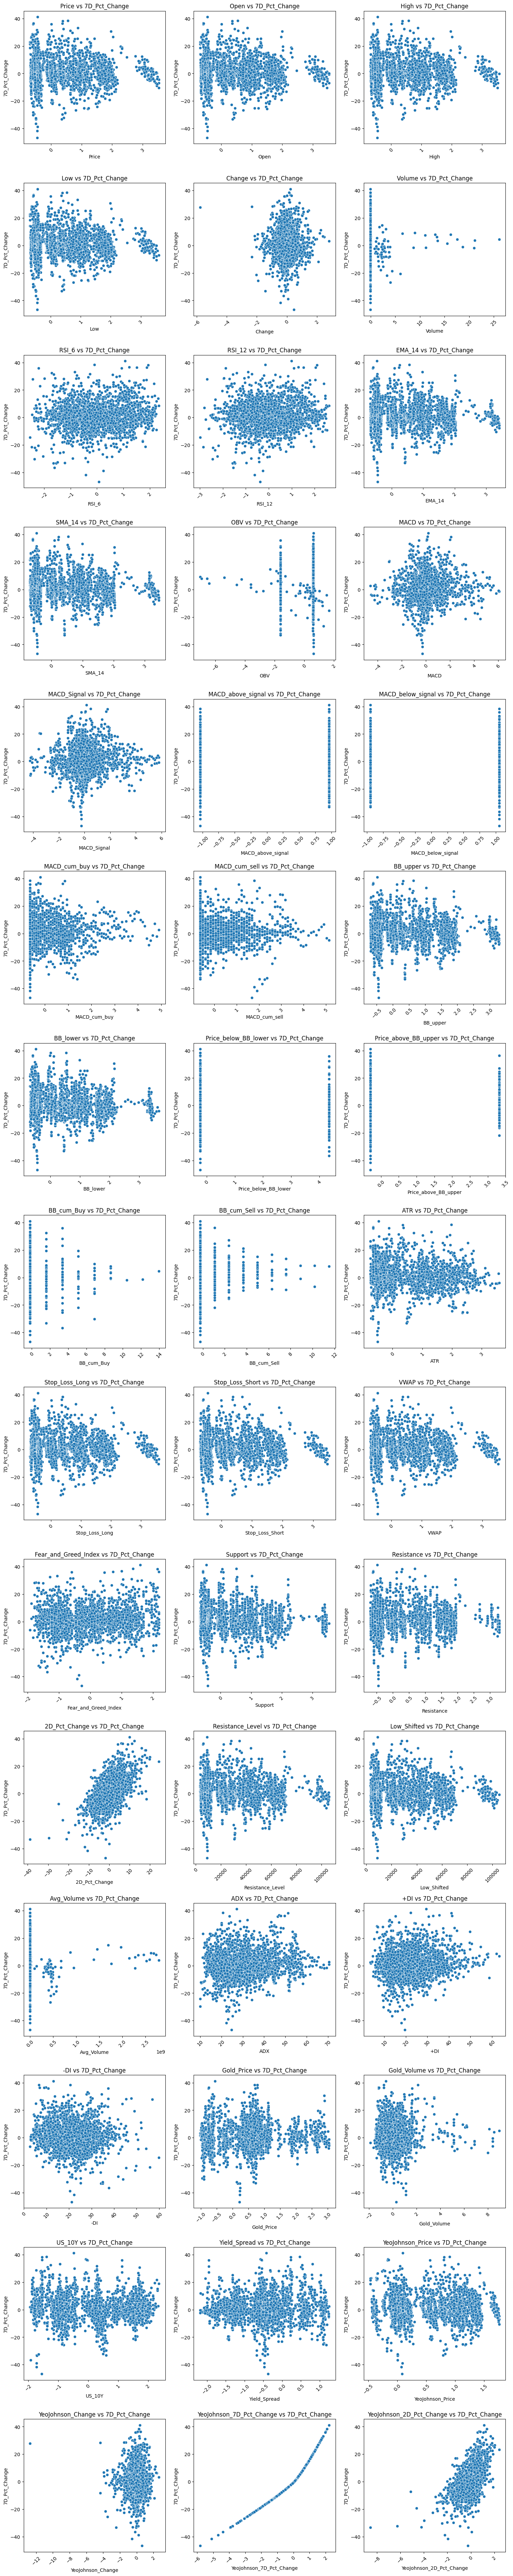

In [54]:
# Select numeric columns
numeric_variables = scaled_btc_data.select_dtypes(include=['float64']).columns.tolist()

# Identify 2-dimensional columns
for column in numeric_variables:
    if len(scaled_btc_data[column].shape) != 1:  # Check if the column is not 1D
        print(f"Column '{column}' is 2-dimensional with shape {scaled_btc_data[column].shape}")

# Filter out 2D columns and remove target from predictors
numeric_variables = [col for col in numeric_variables if len(scaled_btc_data[col].shape) == 1 and col != target]

# Drop rows with missing values
data_numeric = scaled_btc_data[numeric_variables + [target]].dropna()

# Define number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(numeric_variables) + n_cols - 1) // n_cols  # Ceiling division

# Create figure with subplots
fig = plt.figure(figsize=(15, 5 * n_rows))

# Create scatter plots
for i, column in enumerate(numeric_variables, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=data_numeric, x=column, y=target, ax=ax)
    ax.set_title(f"{column} vs {target}")
    ax.set_xlabel(column)
    ax.set_ylabel(target)

    # Rotate x-axis labels if they're too long
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

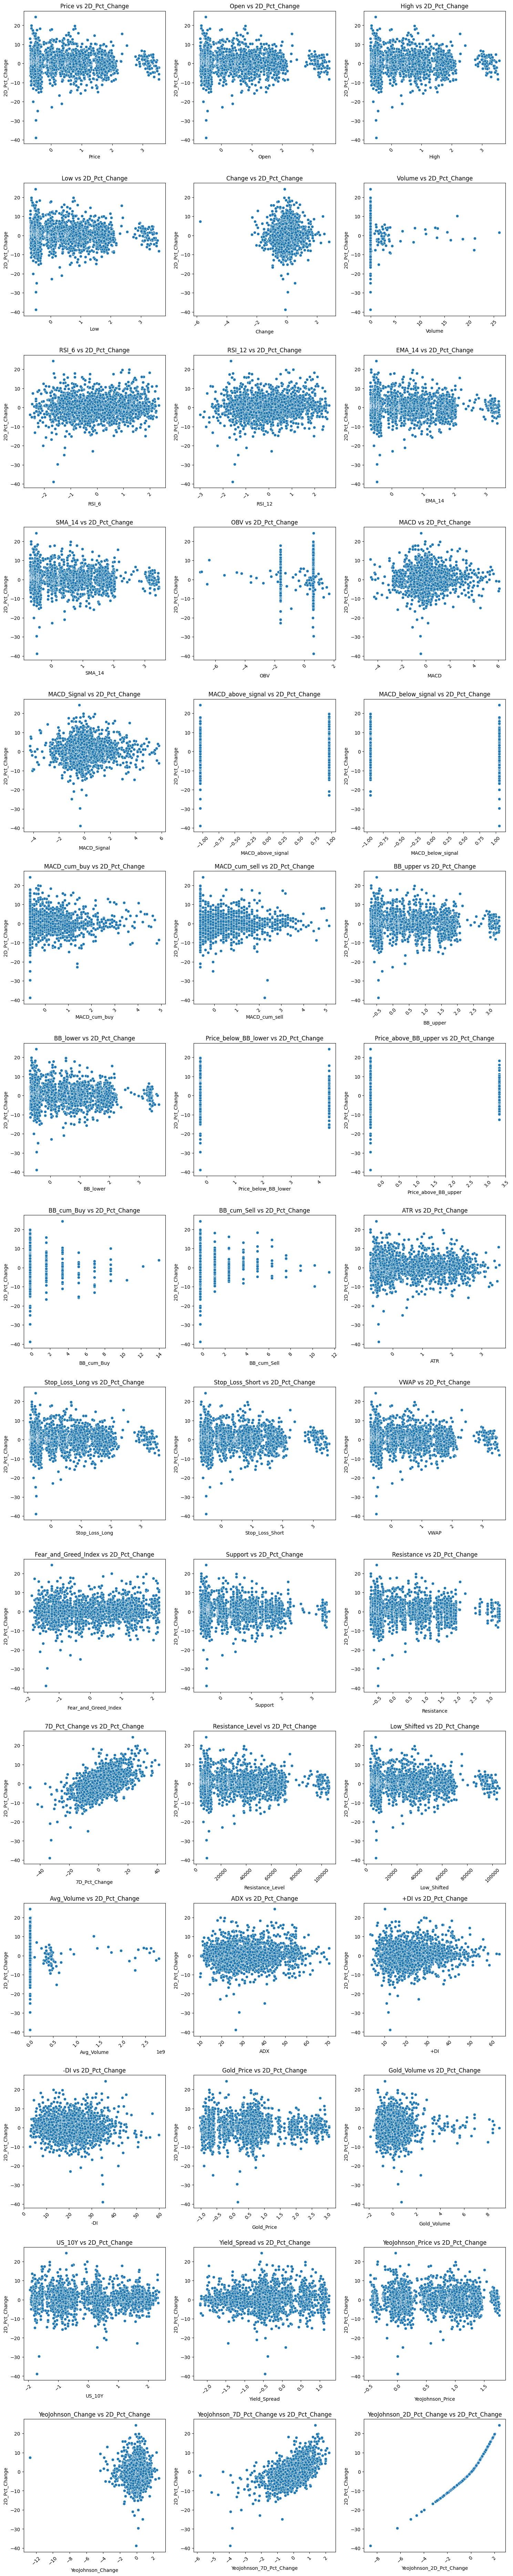

In [63]:
# Select numeric columns
numeric_variables = scaled_btc_data.select_dtypes(include=['float64']).columns.tolist()

# Identify 2-dimensional columns
for column in numeric_variables:
    if len(scaled_btc_data[column].shape) != 1:  # Check if the column is not 1D
        print(f"Column '{column}' is 2-dimensional with shape {scaled_btc_data[column].shape}")

# Filter out 2D columns and remove target from predictors
numeric_variables = [col for col in numeric_variables if len(scaled_btc_data[col].shape) == 1 and col != target2]

# Drop rows with missing values
data_numeric = scaled_btc_data[numeric_variables + [target2]].dropna()

# Define number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(numeric_variables) + n_cols - 1) // n_cols  # Ceiling division

# Create figure with subplots
fig = plt.figure(figsize=(15, 5 * n_rows))

# Create scatter plots
for i, column in enumerate(numeric_variables, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=data_numeric, x=column, y=target2, ax=ax)
    ax.set_title(f"{column} vs {target2}")
    ax.set_xlabel(column)
    ax.set_ylabel(target2)

    # Rotate x-axis labels if they're too long
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

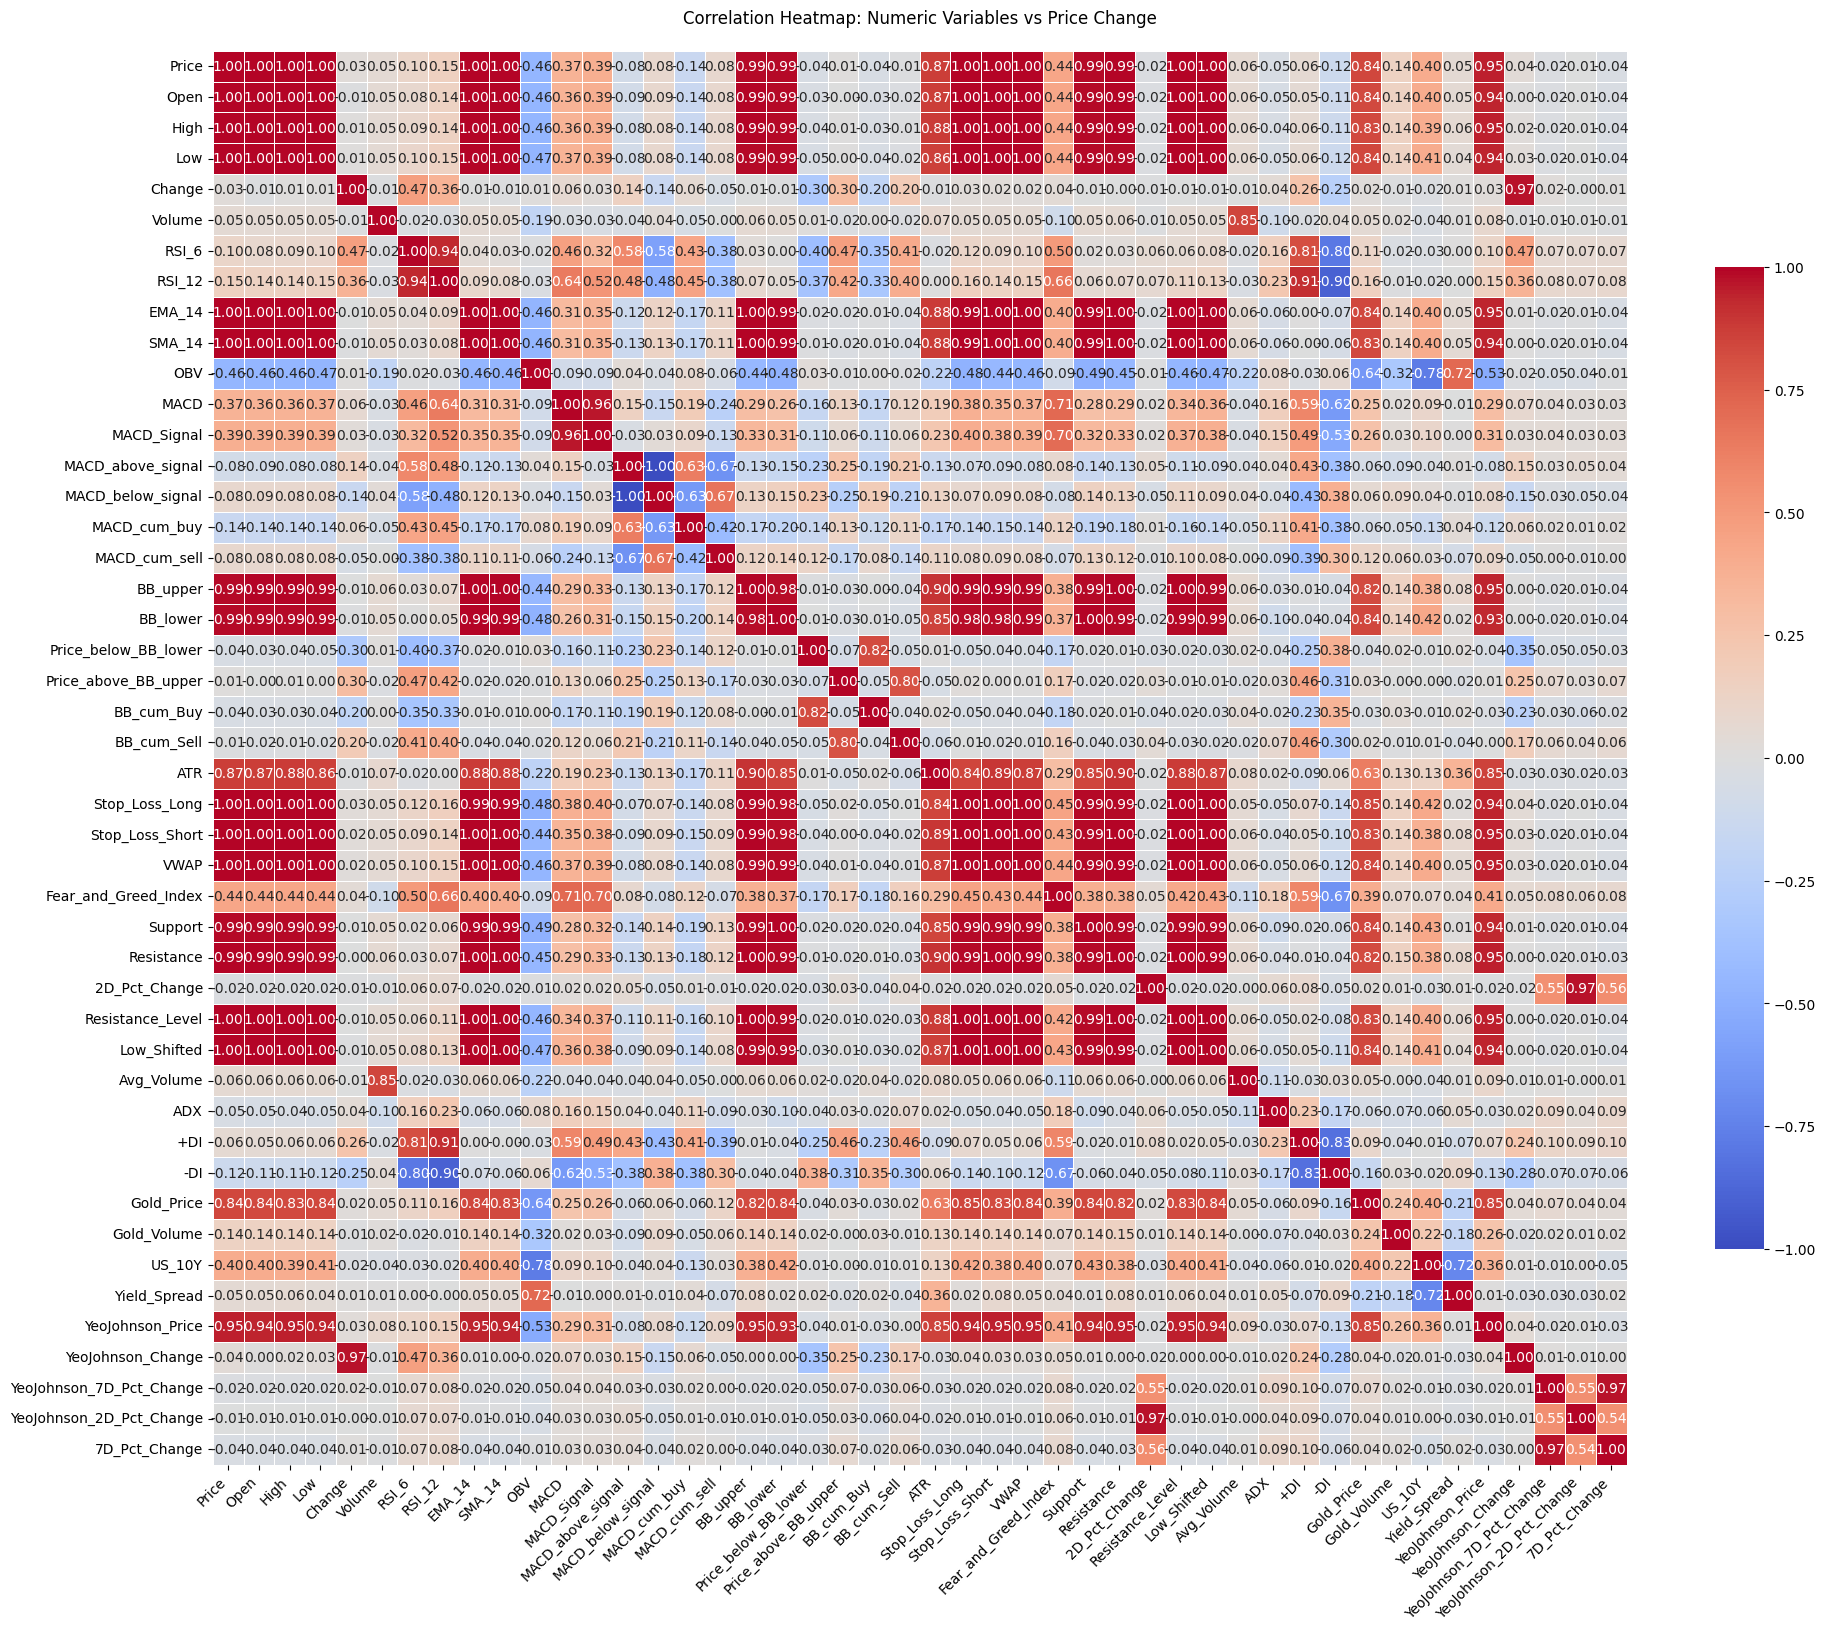

In [55]:
# Create correlation matrix
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(20, 20))

# Create heatmap with annotations
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap: Numeric Variables vs Price Change', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

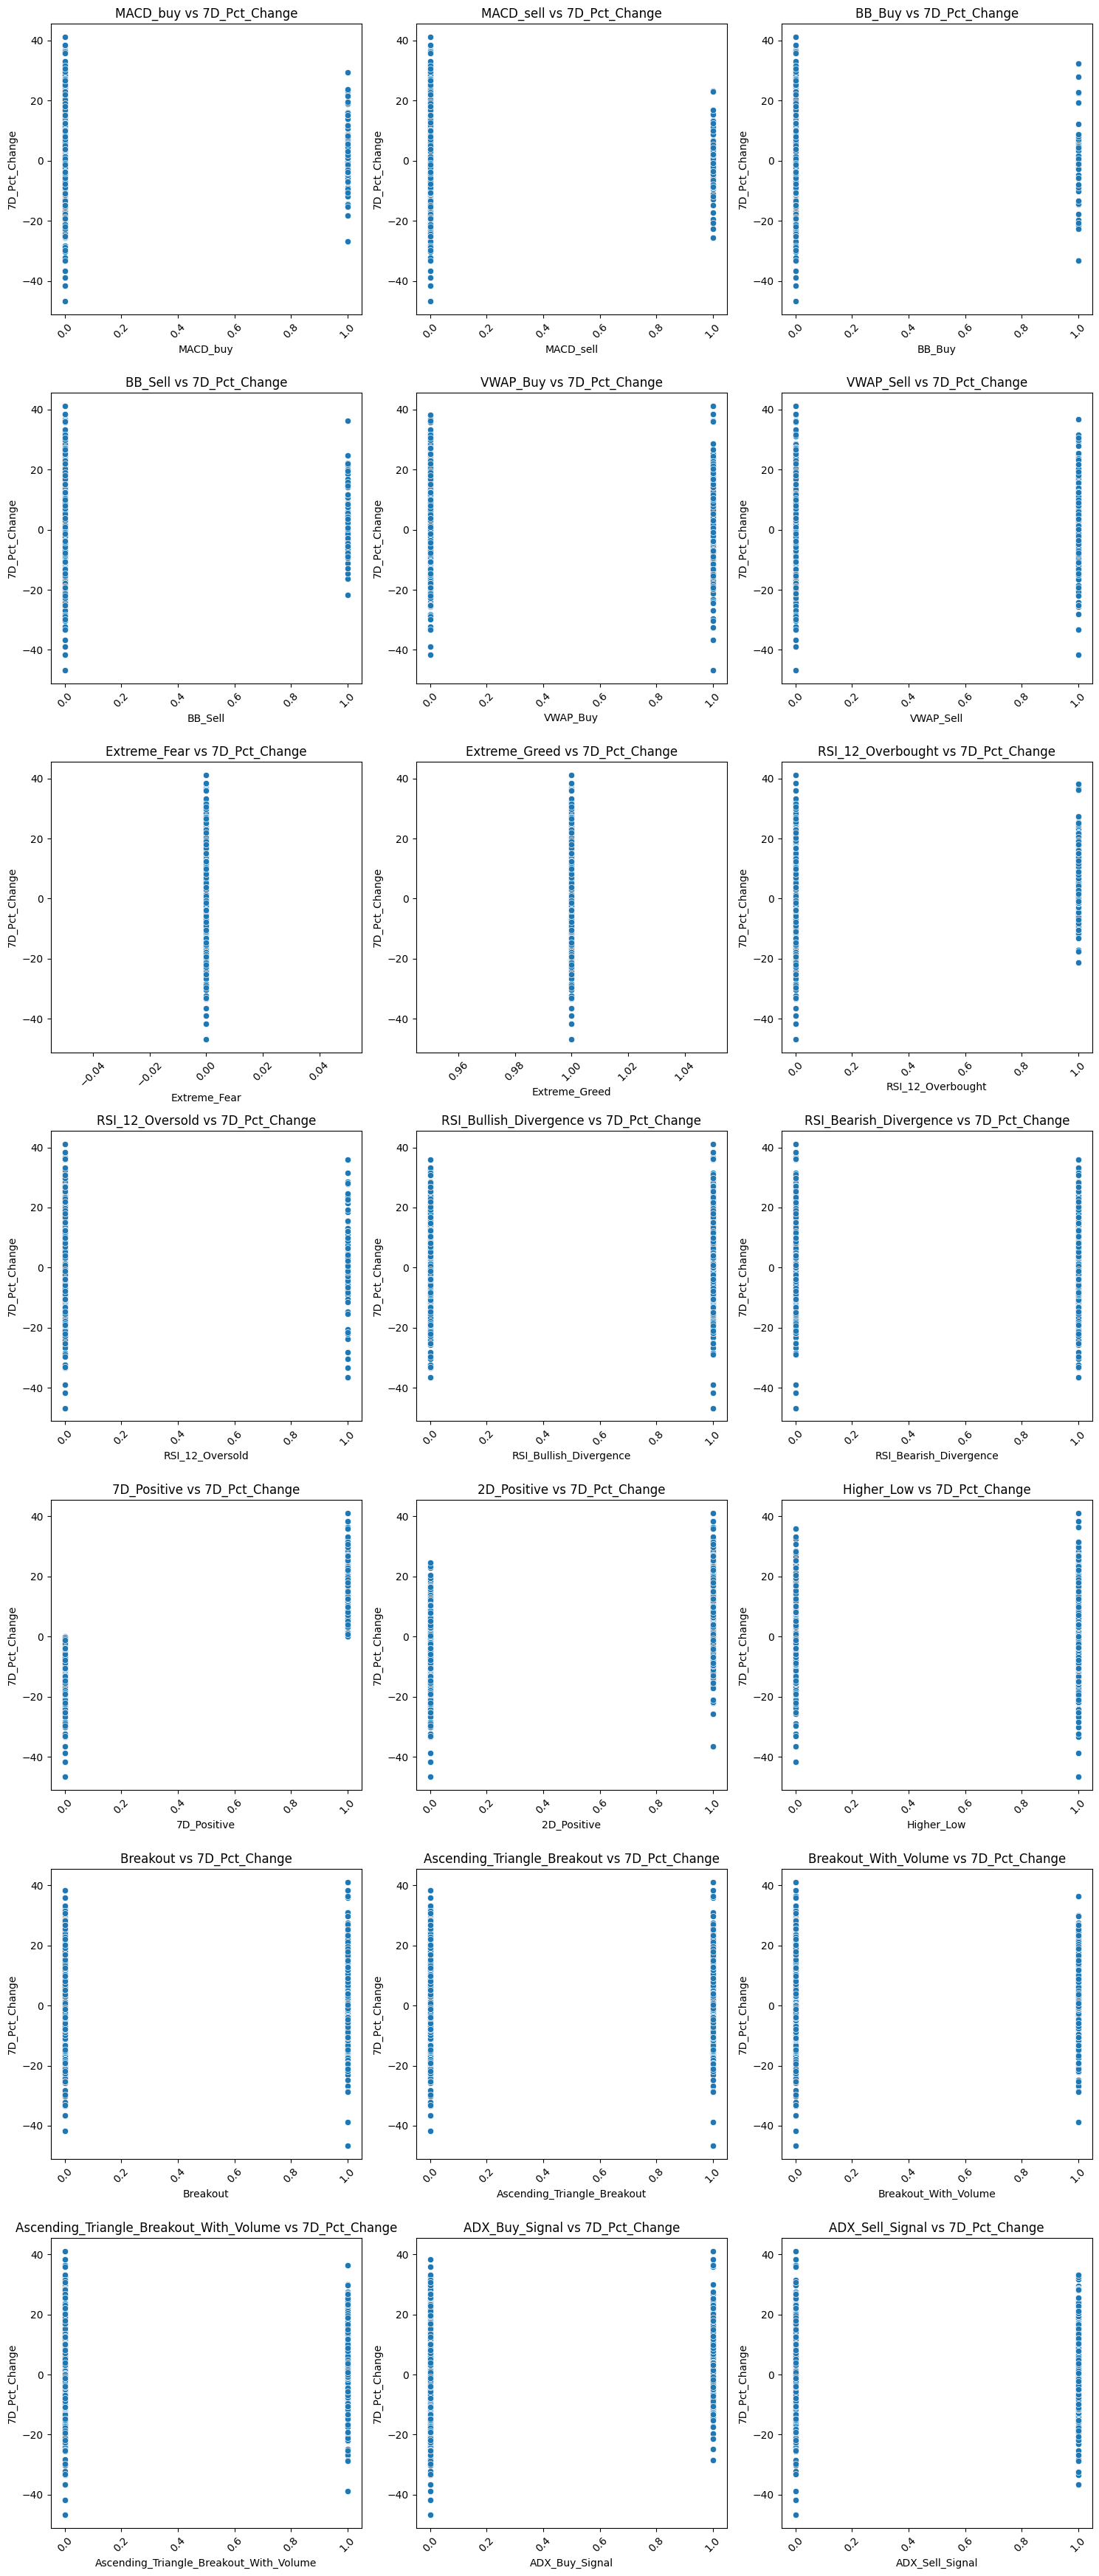

In [56]:
# Select binary columns
binary_variables = scaled_btc_data.select_dtypes(include=['int64']).columns.tolist()

# Identify 2-dimensional columns
for column in binary_variables:
    if len(scaled_btc_data[column].shape) != 1:  # Check if the column is not 1D
        print(f"Column '{column}' is 2-dimensional with shape {scaled_btc_data[column].shape}")

# Filter out 2D columns and remove target from predictors
binary_variables = [col for col in binary_variables if len(scaled_btc_data[col].shape) == 1 and col != target]

# Drop rows with missing values
data_binary = scaled_btc_data[binary_variables + [target]].dropna()

# Define number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(binary_variables) + n_cols - 1) // n_cols  # Ceiling division

# Create figure with subplots
fig = plt.figure(figsize=(15, 5 * n_rows))

# Create scatter plots
for i, column in enumerate(binary_variables, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=data_binary, x=column, y=target, ax=ax)
    ax.set_title(f"{column} vs {target}")
    ax.set_xlabel(column)
    ax.set_ylabel(target)

    # Rotate x-axis labels if they're too long
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

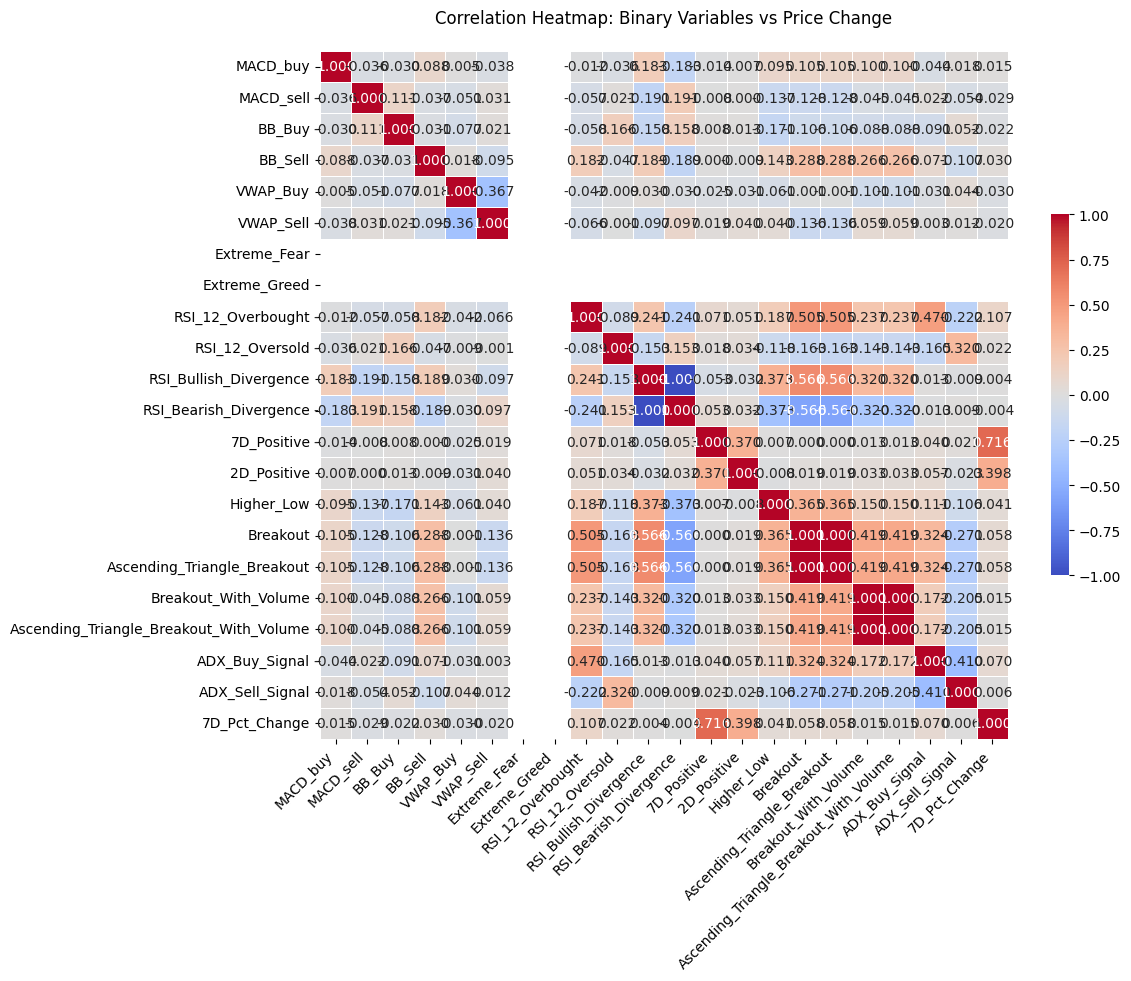

In [57]:
# Create correlation matrix
correlation_matrix = data_binary.corr()

plt.figure(figsize=(12, 10))

# Create heatmap with annotations
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.3f',
            linewidths=0.5,
            cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap: Binary Variables vs Price Change', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

# Model Building

- Time-Based Splitting
- Selecting predictors
- Interaction terms

In [58]:
from itertools import chain, combinations

def gen_combinations(input):
    return sum([list(map(list, combinations(input, i))) for i in range(1,len(input) + 1)], [])

def gen_interactions(X,de,pname):
    s = gen_combinations(range(len(pname)))
    VX = []
    VarX = []
    for i in range(len(s)):
        if len(s[i]) <= de:
            VX.append(np.prod(X[:,s[i]],axis=1))
            VarX.append(list([pname[x] for x in s[i]]))
    VarX2 = []
    for x in VarX:
        if len(x) > 1:
            VarX2.append('_'.join(x))
        else:
            VarX2.append(x[0])
    VX = pd.DataFrame(np.array(VX).T,columns=VarX2)
    return VX, VarX2

In [59]:
# Step 1: Define relevant predictors (skip time-based and unscaled columns)
relevant_predictors = [
    'VWAP_Buy', 'MACD_buy', 'BB_Buy', 'RSI_12_Oversold', 'RSI_Bullish_Divergence',
    'VWAP', 'MACD', 'RSI_6', 'RSI_12', 'ATR'
]

# Step 2: Exclude redundant or invalid combinations
excluded_pairs = [
    ('VWAP_Buy', 'VWAP_Sell'),
    ('MACD_buy', 'MACD_sell'),
    ('BB_Buy', 'BB_Sell')
]

# Step 3: Filter the dataset for only relevant predictors
filtered_data = scaled_btc_data[relevant_predictors].dropna()
X = filtered_data.values  # Extract as numpy array
pname = filtered_data.columns.tolist()  # List of predictor names

# Step 4: Generate interaction terms
interaction_terms, interaction_names = gen_interactions(X, de=2, pname=pname)

# Step 5: Remove excluded interaction terms
valid_interactions = []
valid_names = []

for i, name in enumerate(interaction_names):
    # Split interaction term (e.g., "VWAP_Buy_MACD_buy" -> ["VWAP_Buy", "MACD_buy"])
    components = name.split('_')

    # Check if the pair is in the excluded list
    if len(components) == 2 and tuple(sorted(components)) in excluded_pairs:
        continue  # Skip this interaction term

    # Otherwise, keep it
    valid_interactions.append(interaction_terms.iloc[:, i])
    valid_names.append(name)

# Step 6: Convert valid interactions back to a DataFrame
interaction_df = pd.DataFrame(valid_interactions).T  # Transpose to align rows
interaction_df.columns = valid_names  # Set column names

# Step 7: Append interaction terms to the original dataset
scaled_btc_data_with_interactions = pd.concat([scaled_btc_data, interaction_df], axis=1)

# Display the first few rows of the updated dataset
scaled_btc_data_with_interactions.head()

Date   Price    Open    High     Low  Change  Volume  Day_of_Week  \
0 2018-02-01 -0.4461 -0.4011 -0.4097 -0.4519 -1.5800 -0.0871            3   
1 2018-02-02 -0.4579 -0.4457 -0.4540 -0.4886 -0.4956 -0.0871            4   
2 2018-02-03 -0.4437 -0.4574 -0.4417 -0.4746  0.5348 -0.0871            5   
3 2018-02-04 -0.4855 -0.4432 -0.4468 -0.4879 -1.6487 -0.0871            6   
4 2018-02-05 -0.5381 -0.4851 -0.4869 -0.5417 -2.3181 -0.0871            0   

   Week_of_Year  Month  Quarter  Year   RSI_6  RSI_12  EMA_14  SMA_14    OBV  \
0             5      2        1  2018 -1.6246 -1.4995 -0.3661 -0.3659 0.5739   
1             5      2        1  2018 -1.7225 -1.5842 -0.3784 -0.3738 0.5739   
2             5      2        1  2018 -1.2485 -1.3392 -0.3871 -0.3844 0.5739   
3             5      2        1  2018 -1.6712 -1.6525 -0.4003 -0.3944 0.5739   
4             6      2        1  2018 -1.9888 -1.9619 -0.4188 -0.4060 0.5739   

     MACD  MACD_Signal  MACD_buy  MACD_sell  MACD_above_signal  \
0 -1.0047      -0.9352         0          0            -1.0362   
1 -1.0846      -0.9761         0          0            -1.0362   
2 -1.1119      -1.0145         0          0            -1.0362   
3 -1.1937      -1.0624         0          0            -1.0362   
4 -1.3360      -1.1306         0          0            -1.0362   

   MACD_below_signal  MACD_cum_buy  MACD_cum_sell  BB_upper  BB_lower  BB_Buy  \
0             1.0530       -0.6405        -0.2884   -0.3058   -0.3953       0   
1             1.0530       -0.6405        -0.1729   -0.3189   -0.4040       1   
2             1.0530       -0.6405        -0.0573   -0.3317   -0.4090       0   
3             1.0530       -0.6405         0.0582   -0.3426   -0.4207       1   
4             1.0530       -0.6405         0.1738   -0.3303   -0.4555       0   

   BB_Sell  Price_below_BB_lower  Price_above_BB_upper  BB_cum_Buy  \
0        0               -0.2302               -0.3012     -0.1894   
1        0                4.3434               -0.3012      1.5804   
2        0               -0.2302               -0.3012     -0.1894   
3        0                4.3434               -0.3012      1.5804   
4        0                4.3434               -0.3012      3.3501   

   BB_cum_Sell    ATR  Stop_Loss_Long  Stop_Loss_Short    VWAP  VWAP_Buy  \
0      -0.2434 0.3310         -0.5245          -0.3840 -0.4357         0   
1      -0.2434 0.3288         -0.5372          -0.3950 -0.4667         1   
2      -0.2434 0.3251         -0.5212          -0.3822 -0.4532         0   
3      -0.2434 0.3336         -0.5677          -0.4199 -0.4732         0   
4      -0.2434 0.3589         -0.6279          -0.4662 -0.5219         0   

   VWAP_Sell  Fear_and_Greed_Index  Support  Resistance  Extreme_Fear  \
0          1               -0.7774  -0.4072     -0.2841             0   
1          0               -1.4629  -0.4476     -0.2914             0   
2          0               -0.3204  -0.4476     -0.2933             0   
3          1               -1.0516  -0.4476     -0.3192             0   
4          0               -1.6457  -0.5060     -0.3429             0   

   Extreme_Greed  RSI_12_Overbought  RSI_12_Oversold  RSI_Bullish_Divergence  \
0              1                  0                0                       0   
1              1                  0                1                       0   
2              1                  0                0                       0   
3              1                  0                1                       0   
4              1                  0                1                       0   

   RSI_Bearish_Divergence  7D_Pct_Change  2D_Pct_Change  7D_Positive  \
0                       1       -11.0760         0.6535            0   
1                       1        -2.1747        -7.5451            0   
2                       1        -7.3747       -24.9169            0   
3                       1        -1.7064        -6.3365            0   
4                     

##Model 1: Linear Regression

In [60]:
predictors = valid_names

# Create the formula for the regression model
formula = f"{target} ~ {' + '.join(predictors)}"

# Fit the OLS regression model
lm_model = smf.ols(formula=formula, data= scaled_btc_data_with_interactions).fit()

# Print the summary of the model
print(lm_model.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

### Checking Model Assumptions

Model assumption 1: Mean of residuals should be 0

Model assumption 2: No Heteroscedasticity

Model assumption 3: Linearity

Model assumption 4: Normality of the residuals

###Checking for Autocorrelation

###Checking for Multicollinearity

PCA

Lasso/ Ridge?

##Model 2: ANN

##Model 3: Random Forest/ XGBoost

##Model Validation and Hyperparameter Tuning

Cross-Validation with Time Series Split

#Model Performance Comparison

#Analyse Feature Importance

#Final Model Evaluation and Backtesting

Walk-Forward Validation

## Back Transformation After prediction (for interpretation)

In [ ]:
# Recreate PowerTransformers with stored lambdas for back-transformation
power_transformer_price.lambdas_ = [lambdas['Price_lambda']]
power_transformer_change.lambdas_ = [lambdas['Change_lambda']]
power_transformer_7d_pct_change.lambdas_ = [lambdas['7D_Pct_Change_lambda']]
power_transformer_2d_pct_change.lambdas_ = [lambdas['2D_Pct_Change_lambda']]

# Step 1: De-standardize the standardized values to get Yeo-Johnson transformed values
scaled_btc_data['YeoJohnson_Price_Back'] = (
    scaled_btc_data['YeoJohnson_Price'] * transformed_stds['Price_std']
) + transformed_means['Price_mean']

scaled_btc_data['YeoJohnson_Change_Back'] = (
    scaled_btc_data['YeoJohnson_Change'] * transformed_stds['Change_std']
) + transformed_means['Change_mean']

scaled_btc_data['YeoJohnson_7D_Pct_Change_Back'] = (
    scaled_btc_data['YeoJohnson_7D_Pct_Change'] * transformed_stds['7D_Pct_Change_std']
) + transformed_means['7D_Pct_Change_mean']

scaled_btc_data['YeoJohnson_2D_Pct_Change_Back'] = (
    scaled_btc_data['YeoJohnson_2D_Pct_Change'] * transformed_stds['2D_Pct_Change_std']
) + transformed_means['2D_Pct_Change_mean']

# Step 2: Create temporary DataFrames with the exact column names used during fit
price_back_df = scaled_btc_data[['YeoJohnson_Price_Back']].rename(columns={'YeoJohnson_Price_Back': 'Price'})
change_back_df = scaled_btc_data[['YeoJohnson_Change_Back']].rename(columns={'YeoJohnson_Change_Back': 'Change'})
pct_change_7d_back_df = scaled_btc_data[['YeoJohnson_7D_Pct_Change_Back']].rename(columns={'YeoJohnson_7D_Pct_Change_Back': '7D_Pct_Change'})
pct_change_2d_back_df = scaled_btc_data[['YeoJohnson_2D_Pct_Change_Back']].rename(columns={'YeoJohnson_2D_Pct_Change_Back': '2D_Pct_Change'})

# Step 3: Apply the inverse transformation to recover the original values
scaled_btc_data['Original_Price'] = power_transformer_price.inverse_transform(price_back_df)
scaled_btc_data['Original_Change'] = power_transformer_change.inverse_transform(change_back_df)
scaled_btc_data['Original_7D_Pct_Change'] = power_transformer_7d_pct_change.inverse_transform(pct_change_7d_back_df)
scaled_btc_data['Original_2D_Pct_Change'] = power_transformer_2d_pct_change.inverse_transform(pct_change_2d_back_df)

# Step 4: Display the back-transformed data
print("\nBack-Transformed Data:")
print(scaled_btc_data[['Original_Price', 'Original_Change', 'Original_7D_Pct_Change', 'Original_2D_Pct_Change']].head())

NameError: name 'scaled_btc_data' is not defined